---
title: "Project 2: The Battle of the Silver Arrows"
author: "Aadharsh Pannirselvam"
date: "2/17/23"
format:
    pdf:
        fig-dpi: 300
---

## Citation:
Doğan Yiğit Yenigün, Formula 1 Datasets: 2016 Race Results, Github, obtained from Formula 1 Official Web Site, 2022, https://github.com/toUpperCase78/formula1-datasets/blob/master/PreviousSeasons/Formula1_2016Season_RaceResults.csv.

## Intro

The 2016 Formula 1 Season was the stage for one of the best inter-teammate battles in F1 history between 3-time champion Lewis Hamilton, and his teammate Nico Rosberg at the insanely dominant Mercedes team. Teammate battles for the Driver's title in F1 are especially interesting since different teams build unique (and unequally strong) cars to the regulation set, and have a vested interest (in the form of the Team Championship) in making sure their drivers get along. As such, two drivers on the same team being permitted to consistently battle for wins in identical machinery is exceedingly rare. In the two years prior, Mercedes had been untouchable relative to the other teams on the field, having built the best turbo-hybrid engine for the new regulations set in place for 2014, and Hamilton had been able to take the championships over his teammate. After the defeat of 2015, Nico Rosberg came back with a vengeance, determined to win the championship for the 2016 season. What ensued was a no-holds barred title fight that could have gone either way. Let's take a look at who won it and how it was won using data for the 2016 season scraped from the Formula 1 Official Website by Github user toUpperCase78.

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import warnings
sns.set_theme()
sns.set(rc={'figure.figsize': (9, 6), 'patch.linewidth': 0.0}, font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
season_2016 = pd.read_csv('f1-2016-results.csv')
merc_data = season_2016[season_2016['Team'] == 'Mercedes']
pole_data = season_2016[season_2016['Starting Grid'] == 1]
win_data = season_2016[season_2016['Position'] == '1']
dnf_data = season_2016[season_2016["Time/Retired"] == 'DNF']
podium_data = season_2016[season_2016['Position'].isin(['1', '2', '3'])]
pf_data = season_2016[season_2016['Position'].isin(
    ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])]
races = season_2016['Track'].unique()
warnings.filterwarnings('ignore')
team_palette = {"Mercedes": "#1ce2c9",
                "Red Bull Racing Tag Heuer": "#071c46",
                "Ferrari": "#fa1a35",
                "Force India Mercedes": "#2f6d35",
                "Williams Mercedes": "#6e81c6",
                "McLaren Honda": "#fb5e44",
                "Toro Rosso Ferrari": "#dbaa51",
                "Haas Ferrari": "#7a8187",
                "Renault": "yellow",
                "Sauber Ferrari": "#0A29E8",
                "MRT Mercedes": "#306fbd"}

team_patches = [mpatches.Patch(color='#1ce2c9', label='Mercedes'), 
                mpatches.Patch(color='#071c46', label='Red Bull'), 
                mpatches.Patch(color='#fa1a35', label='Ferrari'),
                mpatches.Patch(color='#2f6d35', label='Force India Mercedes'),
                mpatches.Patch(color='#6e81c6', label='Williams Mercedes'),
                mpatches.Patch(color='#fb5e44', label='McLaren Honda'),
                mpatches.Patch(color='#dbaa51', label='Toro Rosso Ferrari'), 
                mpatches.Patch(color='#7a8187', label='Haas Ferrari'),
                mpatches.Patch(color='yellow', label='Renault'),
                mpatches.Patch(color='#0A29E8', label='Sauber Ferrari'),
                mpatches.Patch(color='#306fbd', label='MRT Mercedes')]

driver_palette = {"Lewis Hamilton": "#1ce2c9",
                  "Nico Rosberg": "#1ce2c9",
                  "Daniel Ricciardo": "#071c46",
                  "Max Verstappen": "#071c46",
                  "Kimi Raikkönen": "#fa1a35",
                  "Sebastian Vettel": "#fa1a35",
                  "Nico Hulkenberg": "#2f6d35",
                  "Sergio Perez": "#2f6d35",
                  "Valtteri Bottas": "#6e81c6",
                  "Felipe Massa": "#6e81c6",
                  "Jenson Button": "#fb5e44",
                  "Stoffel Vandoorne": "#fb5e44",
                  "Fernando Alonso": "#fb5e44",
                  "Carlos Sainz": "#dbaa51",
                  "Daniil Kvyat": "#dbaa51",
                  "Romain Grosjean": "#7a8187",
                  "Esteban Gutierrez": "#7a8187",
                  "Jolyon Palmer": "yellow",
                  "Kevin Magnussen": "yellow",
                  "Marcus Ericsson": "#0A29E8",
                  "Felipe Nasr": "#0A29E8",
                  "Pascal Wehrlein": "#306fbd",
                  "Esteban Ocon": "#306fbd",
                  "Rio Haryanto": "#306fbd"}

def get_season_progression(arr):
    prg = []
    p = 0
    for i in range(len(arr)):
        p += arr[i]
        prg.append(p)
    return np.array(prg)


## Team Dominance

Teams in F1 come in a wide variety of shapes and sizes, with differing engineering burdens, secretive intellectual property and wildly ranging budgets meaning that competitive parity has never been a reality of the sport. Furthermore, teams use engines that are made by one of a handful of manufacturers, with the teams that manufacture their own engines being referred to as works teams. These works teams often have better reliability and performance by virtue of vertical integration and engineering optimization. They also tend to have bigger budgets for more talented designers, and more elaborate aerodynamical innovations. Let's get a better understanding of the competitive hierarchy within the 11 teams that competed in the 2016 Formula 1 season to get an understanding of why the title race for this season was entirely between one team.

### Final Standings in the 2016 F1 Team Championship

In [2]:
constructorsSt = season_2016.groupby('Team')['Points'].sum()
constructorsSt = constructorsSt.sort_values(ascending=False).reset_index()
constructorsSt['Points Gap'] = constructorsSt["Points"].diff(1)
constructorsSt.set_index(np.array(range(1,12))).fillna('-').style.set_precision(0).set_caption('Final Standings in the 2016 F1 Team Championship')  # type: ignore



,Team,Points,Points Gap
1,Mercedes,765,-
2,Red Bull Racing Tag Heuer,468,-297
3,Ferrari,398,-70
4,Force India Mercedes,173,-225
5,Williams Mercedes,138,-35
6,McLaren Honda,76,-62
7,Toro Rosso Ferrari,63,-13
8,Haas Ferrari,29,-34
9,Renault,8,-21
10,Sauber Ferrari,2,-6


Table 1: Final Standings in the 2016 F1 Team Championship. This table depicts the final team standings at the end of the 2016 F1 season and the points gaps from team to team, as well as the engine supplier that each team used, showing us the competitive order and approximate strength of each team and each of the four engine suppliers (Mercedes, Ferrari, Renault/Tag Heuer, and Honda). The 2016 Formula 1 Constructors Championship had a clear winner, with the Mercedes team scoring 765 points and leading by 297 points over Red Bull Racing.


The biggest gaps in team points are between Mercedes (1st) and Red Bull (2nd) at 297 points, and between Ferrari (3rd) and Force India (4th) at 225 points, showing the comparative disparity between Mercedes and the rest of the top three teams, and between the top three teams and the rest of the field. With regards to the competitiveness of the engine manufacturers, it largely seems that Mercedes built the best engine (ignoring MRT as an extreme outlier), followed somewhat distantly by Ferrari and then Renault/Tag Heuer close behind (with the works Renault team grossly underperforming Red Bull), and finally with Honda as an unknown quantity because of their performance being tied to McLaren by virtue of there only being one team with Honda engines. Reliability in terms of DNF results will shed more light here.

Let's get an idea of how the gap between Mercedes and the other two top teams opened up, at the point where Mercedes was closer to the maximum theoretical points haul of 903 points over the 21 race season (21 * (25+18), achieved only by scoring first and second at every race) than Red Bull Racing in second place.

### Top 3 Teams' Points Progression in the 2016 F1 Championship

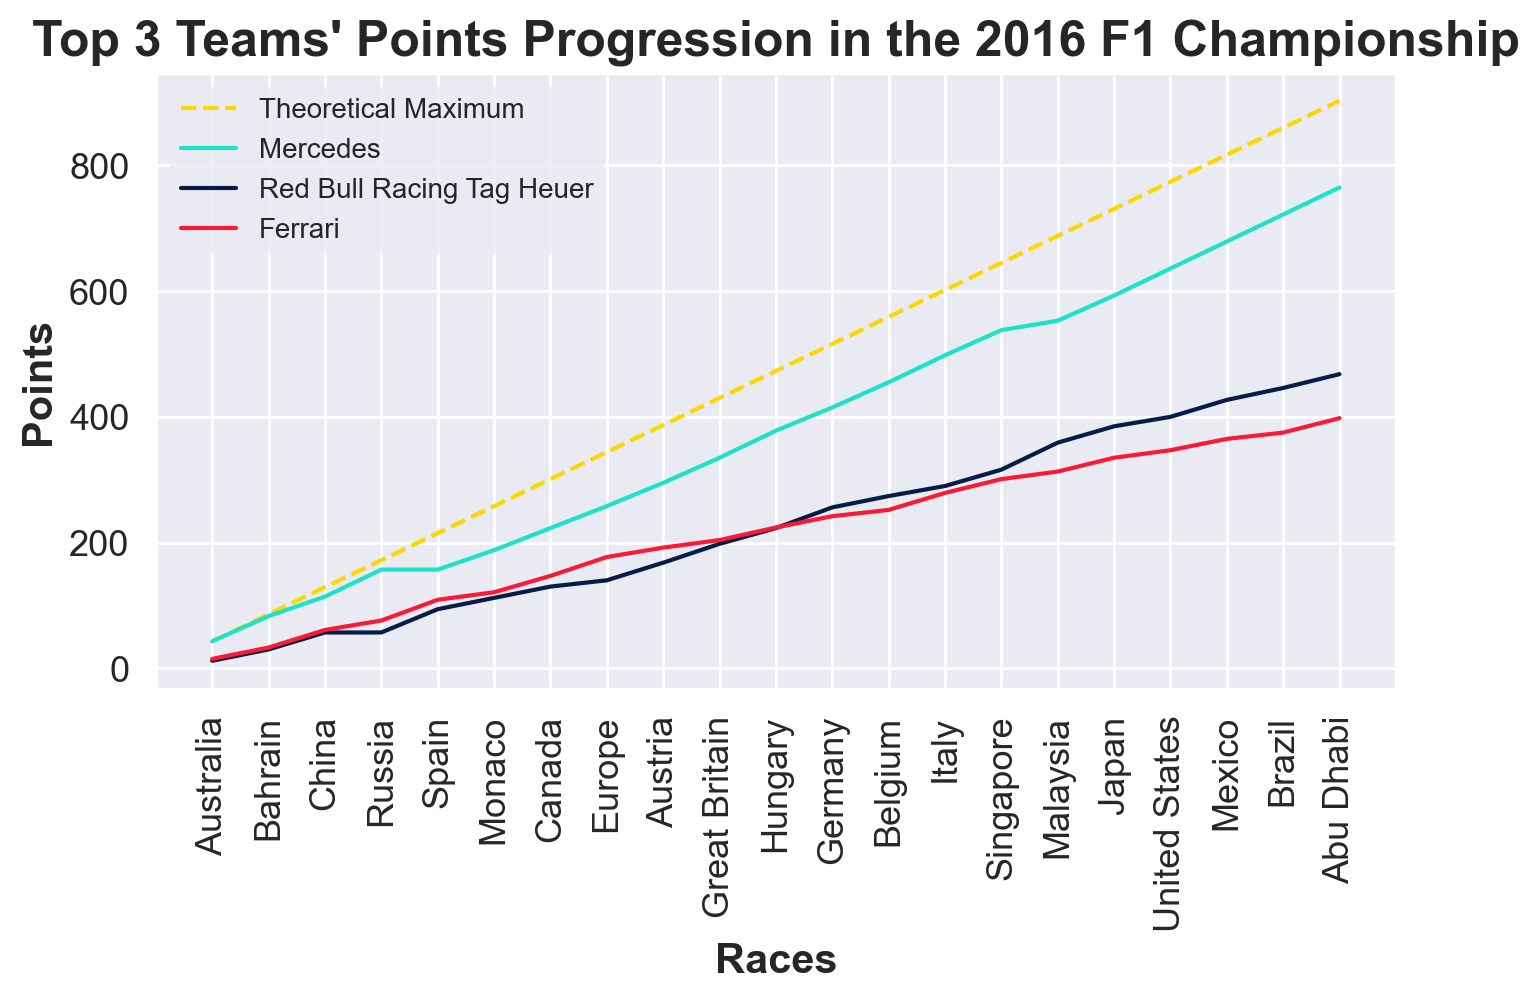

In [3]:
team_points = season_2016.pivot_table(index='Track', columns='Team', values='Points', aggfunc='sum')
plt.figure(figsize=(8,4))
x = np.linspace(0,20,100)
y = 43*(x+1)
plt.plot(x, y, color='gold', label='Theoretical Maximum', ls = '--')
for i in ['Mercedes', 'Red Bull Racing Tag Heuer', 'Ferrari']:
    tp = []
    for j in range(len(races)):
        tp.append(team_points.loc[races[j],i])
    plt.plot(get_season_progression(tp), color=team_palette[i], label=i)
plt.title("Top 3 Teams' Points Progression in the 2016 F1 Championship", fontsize=18, fontweight='bold')
plt.xlabel('Races', fontsize=15, fontweight='bold')
plt.ylabel('Points', fontsize=15, fontweight='bold')
plt.xticks(np.arange(21), races, rotation=90,fontsize=13) 
plt.yticks(fontsize=13)
plt.legend(fontsize=10)
plt.show()

Figure 1: Top 3 Teams' Points Progression in the 2016 F1 Championship. This line graph shows the points progression of the top 3 F1 teams (Mercedes, Red Bull, and Ferrari) over the course of the 2016 F1 season, as well as the theoretical maximum amount of points a team could have earned at any point in the season (by placing their two drivers in first and second in each race).

The graph reveals that Mercedes took and retained the lead for the entire season, with the gap to the second place team widening at every race save for Spain and Malaysia, where Ferrari and Red Bull respectively caught up. These two races are clear exceptions, with Malaysia having about half as many expected points, and Spain having no points at all. We will look into exactly what happened at these races as we look at driver results. The graph also shows us that the team race between Red Bull and Ferrari was quite close, with the second place spot changing hands once (from Ferrari to Red Bull) at the Hungarian race.

Reliability over the entire season is a crucial factor of a team's performance, insofar as teams are limited to a certain number of parts for the season and also need to make the parts that can't be changed out mid-race last for the entirety of the ~300km with minimal performance degradation. A DNF constitutes no points earned, irrespective of how fast a car is. With an understanding of how many points each team earned, let's take a look at how many DNFs each team had, so that we can get an idea if Mercedes won through reliability or through speed.

### DNFs by Team in the 2016 F1 Championship

Text(0.5, 1.0, 'DNFs by Team in the 2016 F1 Championship')

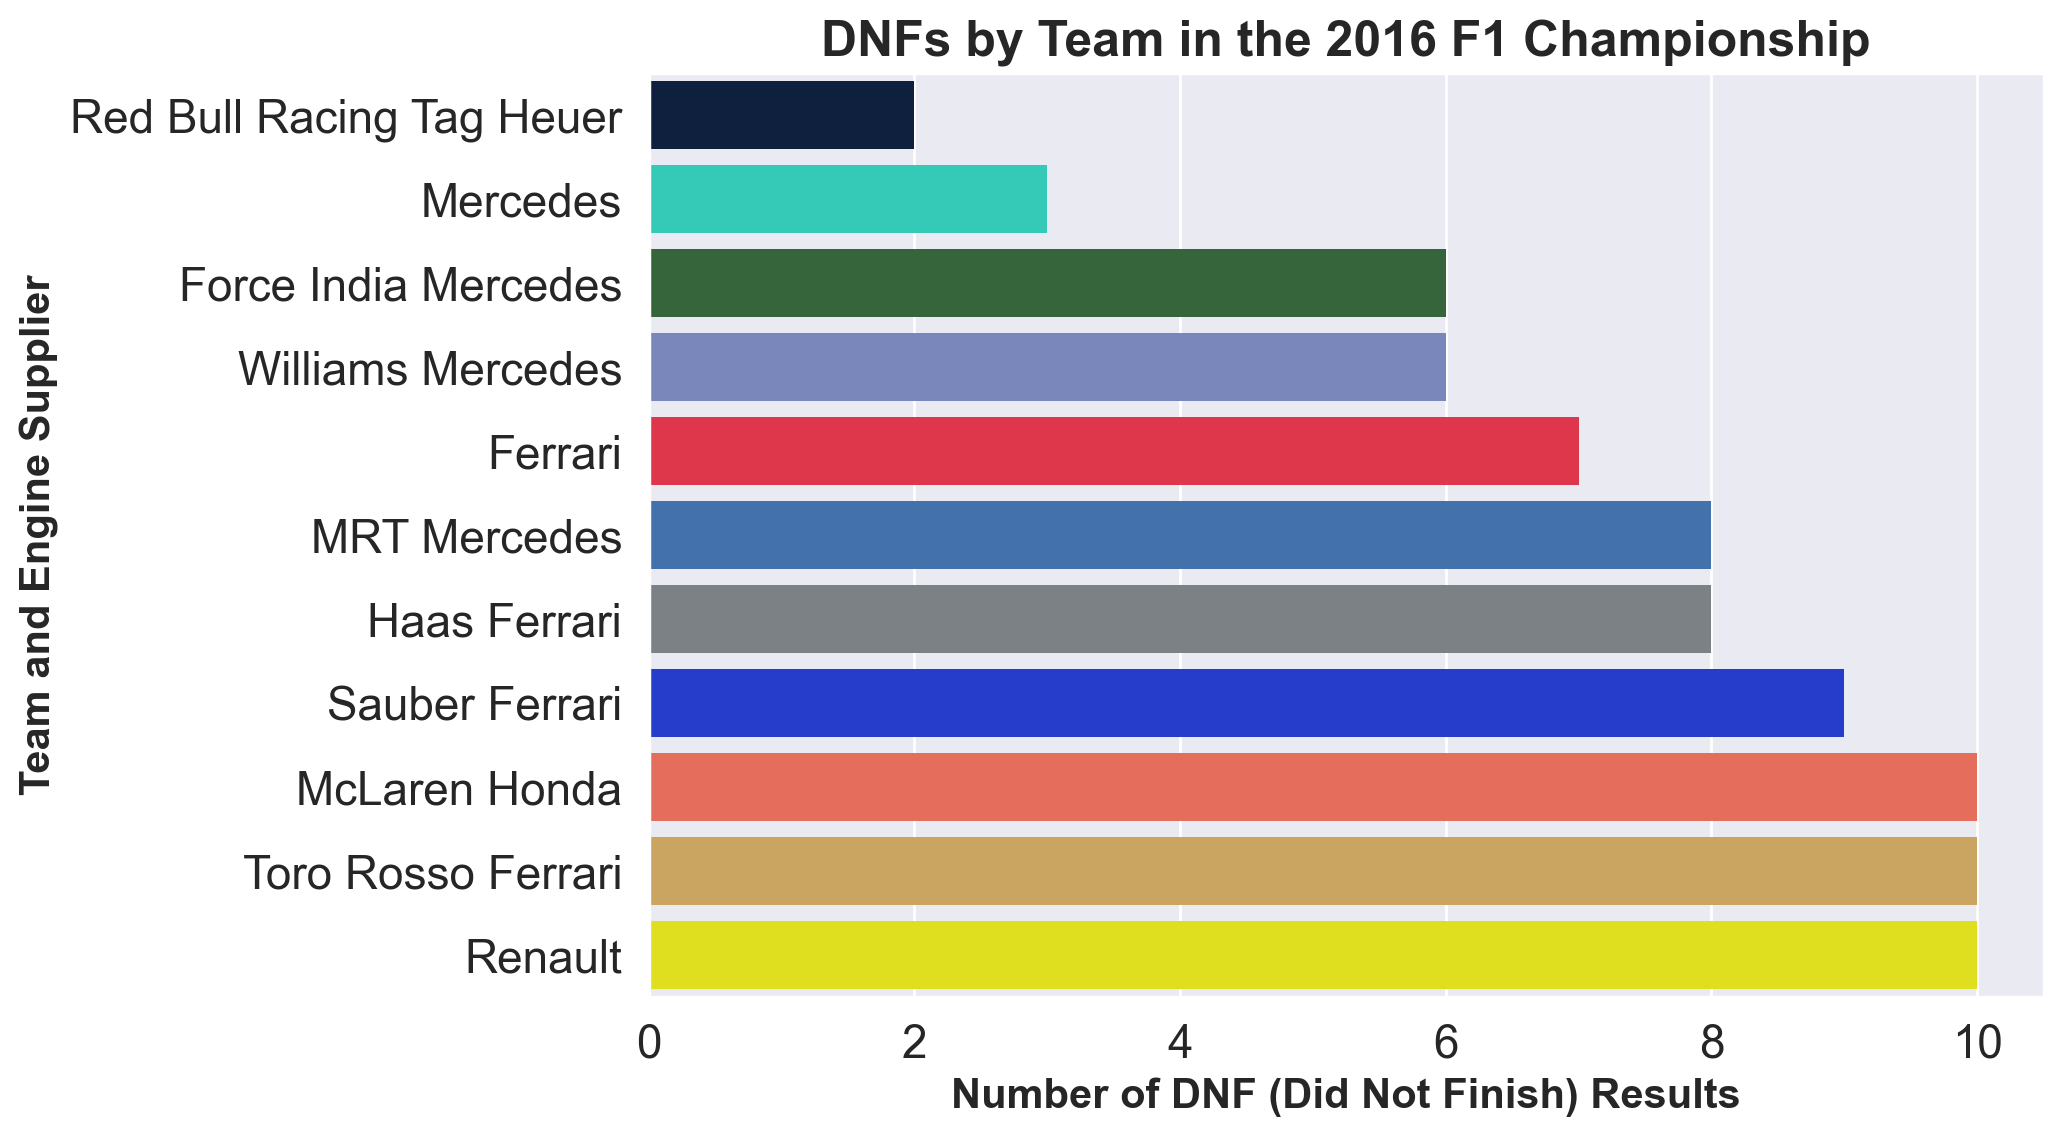

In [4]:
DNFCnt = dnf_data['Team'].value_counts().rename_axis(
    'Team').reset_index(name='DNFs').sort_values('DNFs', ascending=True)
DNFplot = sns.barplot(data=DNFCnt, x='DNFs', y='Team', orient = 'h', palette=team_palette)
DNFplot.set_ylabel("Team and Engine Supplier", fontsize = 15, fontweight='bold')
DNFplot.set_xlabel("Number of DNF (Did Not Finish) Results", fontsize = 15, fontweight='bold')

DNFplot.set_title("DNFs by Team in the 2016 F1 Championship", fontsize=18, fontweight='bold')

Figure 2: DNFs by Team in 2016 F1 Championship. This bar graph tracks the number of DNF results per team over the 2016 F1 Season, with the coloring on the graph representing teams' car/branding colors. We see that no teams made it through the season without having a DNF result, and Red Bull had the lowest number of DNF results at 2, while Mercedes had 3 DNF results between its two drivers. The gap between these two teams and the rest is significant as Force India and Williams tie for the third lowest number of DNFs at 6. There was a three way tie for the highest number of DNFs, with McLaren, Toro Rosso, and Renault having 10 DNFs over their two cars in the 21 races of the season.


The result on a team level is interesting when looking towards Table 1 and Figure 1 at how massive the gap was in constructor's points between Red Bull and Mercedes, and perhaps says something about the number of on-track tangles between the Mercedes drivers who might have been furiously fighting each other for the individual championship, based on how utterly dominant the team was for that year. Also notable is the fact that Ferrari had 7 DNFs but were still able to keep close with Red Bull, placing above Williams and Force India in the Constructors standings despite having one more DNF result than either team. This shows the Mercedes engine as having a good baseline reliability, which is an especially stark contrast to the Honda engine in the back of the McLaren. A baffling result is Renault and Red Bull having completely different reliability results despite both using the same base engine, which could maybe be explained by on-track action and other mechanical factors that Red Bull built for themselves. Mercedes having three DNF results also shows us that their reliability was important to their team victory relative to the entire grid, but they must have had a massive performance differential, since Red Bull had fewer team DNFs on net.

## Driver Statistics

### Final Standings in the 2016 F1 Drivers Championship

In [5]:
DriversSt = season_2016.groupby(['Driver', 'Team'])['Points'].sum()
DriversSt = DriversSt.sort_values(ascending=False).reset_index()
DriversSt['Points Gap'] = DriversSt["Points"].diff(1)
DriversSt['Avg Points per Race'] = (DriversSt['Points'] / 21)
DriversSt.at[4,'Avg Points per Race'] *= (21/17)
DriversSt.at[17,'Avg Points per Race'] *= (21/17)
DriversSt.at[14,'Avg Points per Race'] *= (21/4)
DriversSt.at[15,'Avg Points per Race'] *= (21/4)
DriversSt.at[21,'Avg Points per Race'] *= 21
DriversSt ['Points Gap'] = DriversSt['Points Gap'].fillna(0).astype(int)
DriversSt.at[0,'Points Gap'] = '-'
DriversSt.set_index(np.array(range(1,27))).style.format({'Avg Points per Race':'{:.2f}'}).set_caption('Final Standings in the 2016 F1 Drivers Championship')




,Driver,Team,Points,Points Gap,Avg Points per Race
1,Nico Rosberg,Mercedes,385,-,18.33
2,Lewis Hamilton,Mercedes,380,-5,18.10
3,Daniel Ricciardo,Red Bull Racing Tag Heuer,256,-124,12.19
4,Sebastian Vettel,Ferrari,212,-44,10.10
5,Max Verstappen,Red Bull Racing Tag Heuer,191,-21,11.24
6,Kimi Raikkönen,Ferrari,186,-5,8.86
7,Sergio Perez,Force India Mercedes,101,-85,4.81
8,Valtteri Bottas,Williams Mercedes,85,-16,4.05
9,Nico Hulkenberg,Force India Mercedes,72,-13,3.43
10,Fernando Alonso,McLaren Honda,54,-18,2.57


Table 2: Final Standings in the 2016 F1 Drivers Championship. This table shows us the final driver standings in the 2016 F1 Championship for each of the 26 unique driver-team pairings that competed, as well as the points gap from position to position, as well as the number of points each position scored per race to earn their place in the standings.

As we can see from the table showing the Final Drivers standings in the 2016 F1 Championship, Nico Rosberg beat Lewis Hamilton to the title by only 5 points over 21 races (0.23 points per race) in a championship battle that very clearly was a two horse race, at the point where both drivers had a 100+ point gap to Daniel Ricciardo in third place.

A quirk worth noting above is that Max Verstappen and Daniil Kvyat both appear twice for Toro Rosso and Red Bull, which is because Verstappen and Kvyat swapped seats before the Spanish race due to Kvyat's poor performances at the start of the season. As such, their points per race are based on the number of races that they spent at either team. Regarding this oddity, we will report the drivers' teams based on the team that they spent the majority of their time with, which is to say that we will regard Max Verstappen as a Red Bull Driver and Daniil Kvyat as a Toro Rosso Driver. Similarly, Stoffel Vandoorne was a substitute driver for McLaren who only raced for one race, and Esteban Ocon replaced Rio Haryanto after the twelfth race.

As seen from the Drivers Championship table above, the two Mercedes drivers had around 18 points per race on average, which is notable since 25 points are awarded to first place finishers in a race and 18 points are awarded to second place finishers in a race, telling us that Rosberg and Hamilton must have traded wins fairly evenly. Let's dive into win statistics to get a better idea of where the season was won.

### Number of Wins Per Driver in the 2016 F1 Drivers Championship

In [6]:
winnerCnt = win_data['Driver'].value_counts().rename_axis(
    'Driver').reset_index(name='Wins')
winnerCnt['Win Percentage'] = ((winnerCnt['Wins'] / 21) * 100)
winnerCnt['Win Percentage'] = winnerCnt['Win Percentage']
winnerCnt['Win Percentage'] = np.round(winnerCnt['Win Percentage'], decimals = 2)
winnerCnt['Team'] = ['Mercedes', 'Mercedes', 'Red Bull Racing Tag Heuer', 'Red Bull Racing Tag Heuer']
winnerCnt.style.format({'Win Percentage':'{:.2f}'}).set_caption('Final Standings in the 2016 F1 Drivers Championship').hide(axis='index')



Driver,Wins,Win Percentage,Team
Lewis Hamilton,10,47.62,Mercedes
Nico Rosberg,9,42.86,Mercedes
Max Verstappen,1,4.76,Red Bull Racing Tag Heuer
Daniel Ricciardo,1,4.76,Red Bull Racing Tag Heuer


Table 3: Number of Wins Per Driver in the 2016 F1 Drivers Championship. As we can see from the table, only Mercedes and Red Bull and the four drivers that spent the majority of the season at those teams won races in 2016, with Lewis Hamilton winning one more race than Nico Rosberg, and the Red Bull drivers taking a race each over the 21 races of the season.

Insofar as a race win is 25 points, and a second place finish is 18 points (making the gap between the two eight points), the fact that Lewis Hamilton got an additional win over Nico Rosberg and ended the season only five points behind him hints at some very tight margins among the rest of the results. Putting these win counts in terms of percentages also make it clear how strong the Mercedes team was over the whole season, with the two drivers collectively scoring 19 of the 21 wins, which is a little over 90%. Let's see which of the Mercedes drivers scored more podiums.

### Podiums Per Driver in the 2016 F1 Drivers Championship

Text(0.5, 1.0, 'Podiums Per Driver in the 2016 F1 Drivers Championship')

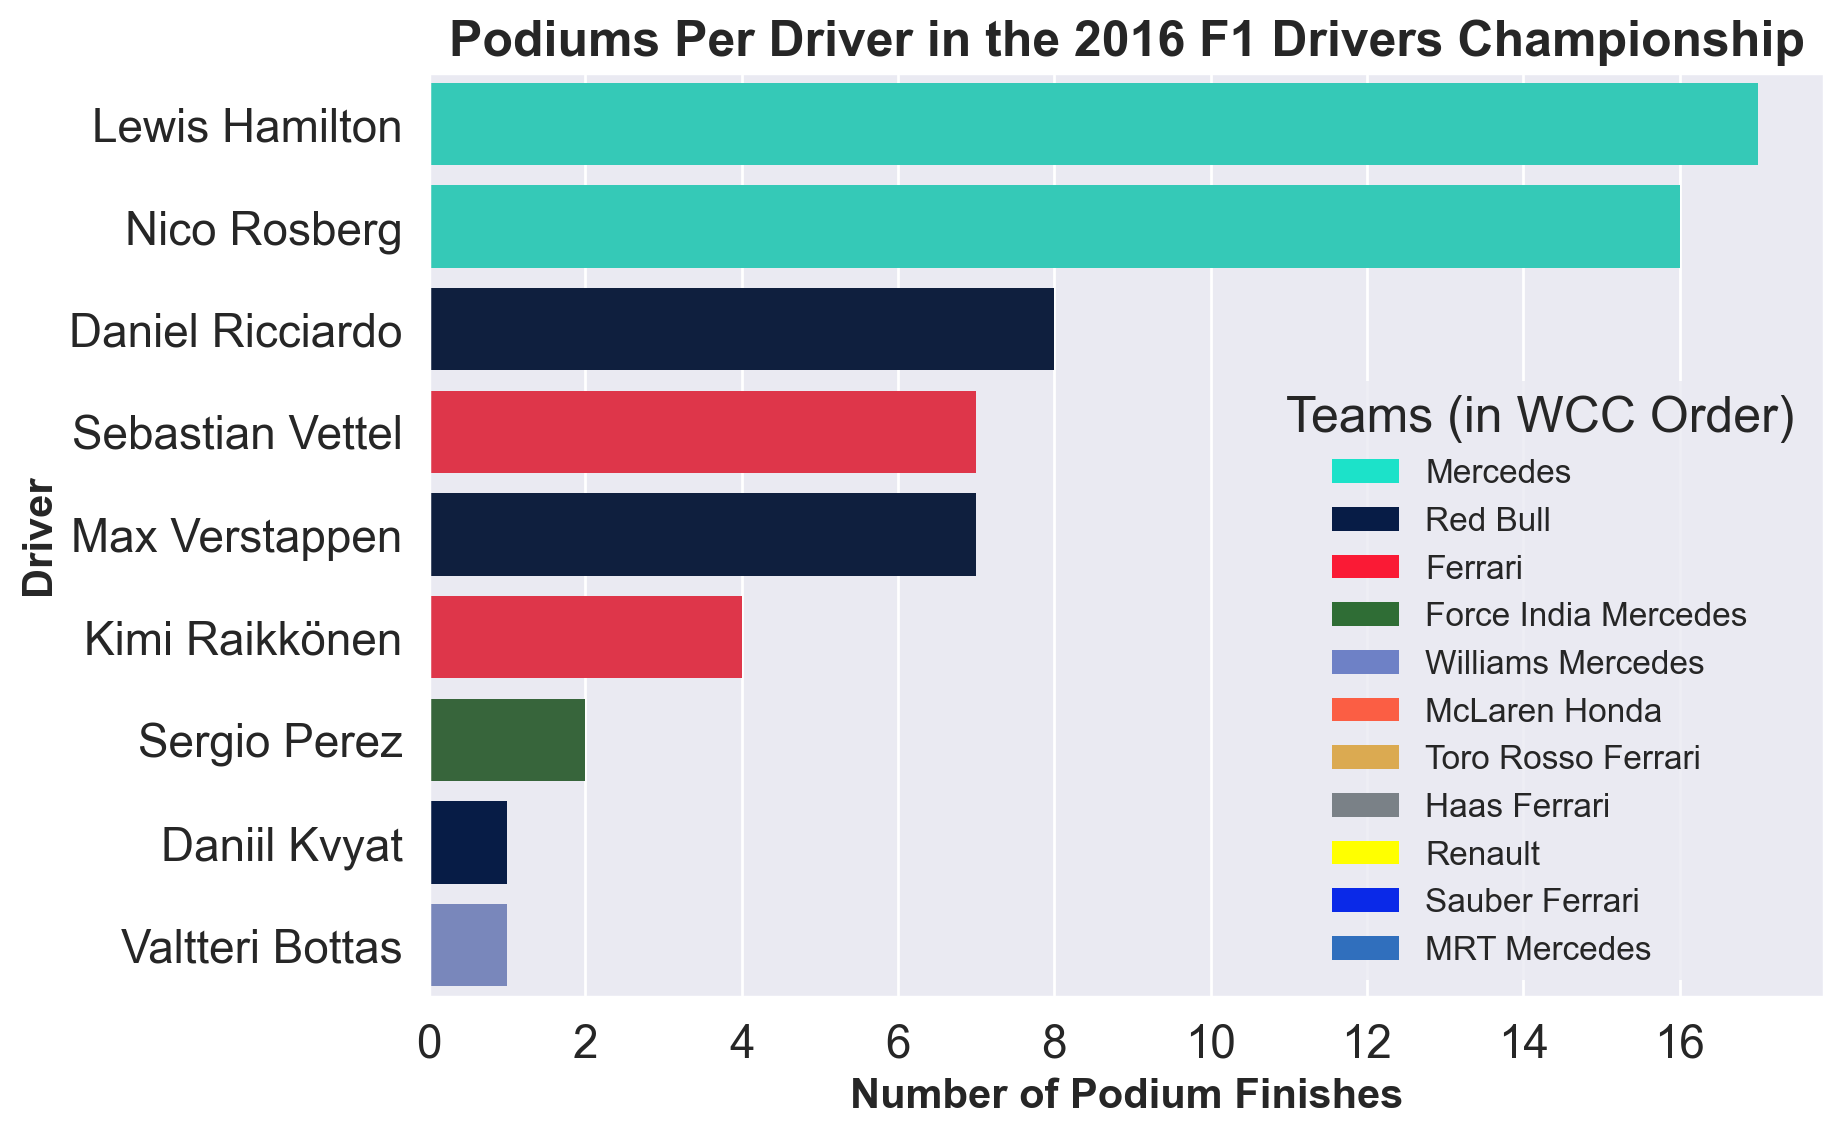

In [7]:
podiumCnt = podium_data['Driver'].value_counts().rename_axis(
    'Driver').reset_index(name='Podiums')
podiumplot = sns.barplot(data=podiumCnt, x='Podiums',
                      y='Driver', orient='h', palette=driver_palette)
podiumplot.set_ylabel("Driver", fontsize=15, fontweight='bold')
podiumplot.set_xlabel("Number of Podium Finishes", fontsize=15, fontweight='bold')
plt.legend(title="Teams (in WCC Order)", handles=team_patches, fontsize=12)
i = 0
for bar in podiumplot.patches:
    i+=1
    if i ==8:
        bar.set_color('#071c46') 
podiumplot.set_title("Podiums Per Driver in the 2016 F1 Drivers Championship", fontsize=18, fontweight='bold')


Figure 3: Number of Podiums Per Driver in the 2016 F1 Drivers Championship. This bar graph shows us how often each driver finished in the podium places (1st, 2nd, or 3rd), omitting the drivers who failed to score a podium. The color encoding represents the team that a driver achieved podiums for.

Looking at the legend/reference to the Team Rankings, we see that the lowest ranked team to score a podium was the Williams Mercedes of Bottas, meaning that the bottom 6 teams never finished on the podium in the 21 races of the 2016 season, and that no team outside of the top three had both of their drivers finish on the podium. With regards to the title race, we see that Hamilton has one more podium finish than Rosberg, and both have twice as many as Ricciardo, who has the third highest number of podium finishes.

Ricciardo having half as many podiums as Rosberg and Hamilton combined with Vettel and Verstappen being tied for podiums tells us that the third place spot on the podium was quite competitive for this season. Let's take a look at overall points to see what the driver-team representation looks like further down the order.

### Number of Points Finishes Per Driver in the 2016 F1 Drivers Championship

Text(0.5, 1.0, 'Number of Points Finishes Per Driver in the 2016 F1 Drivers Championship')

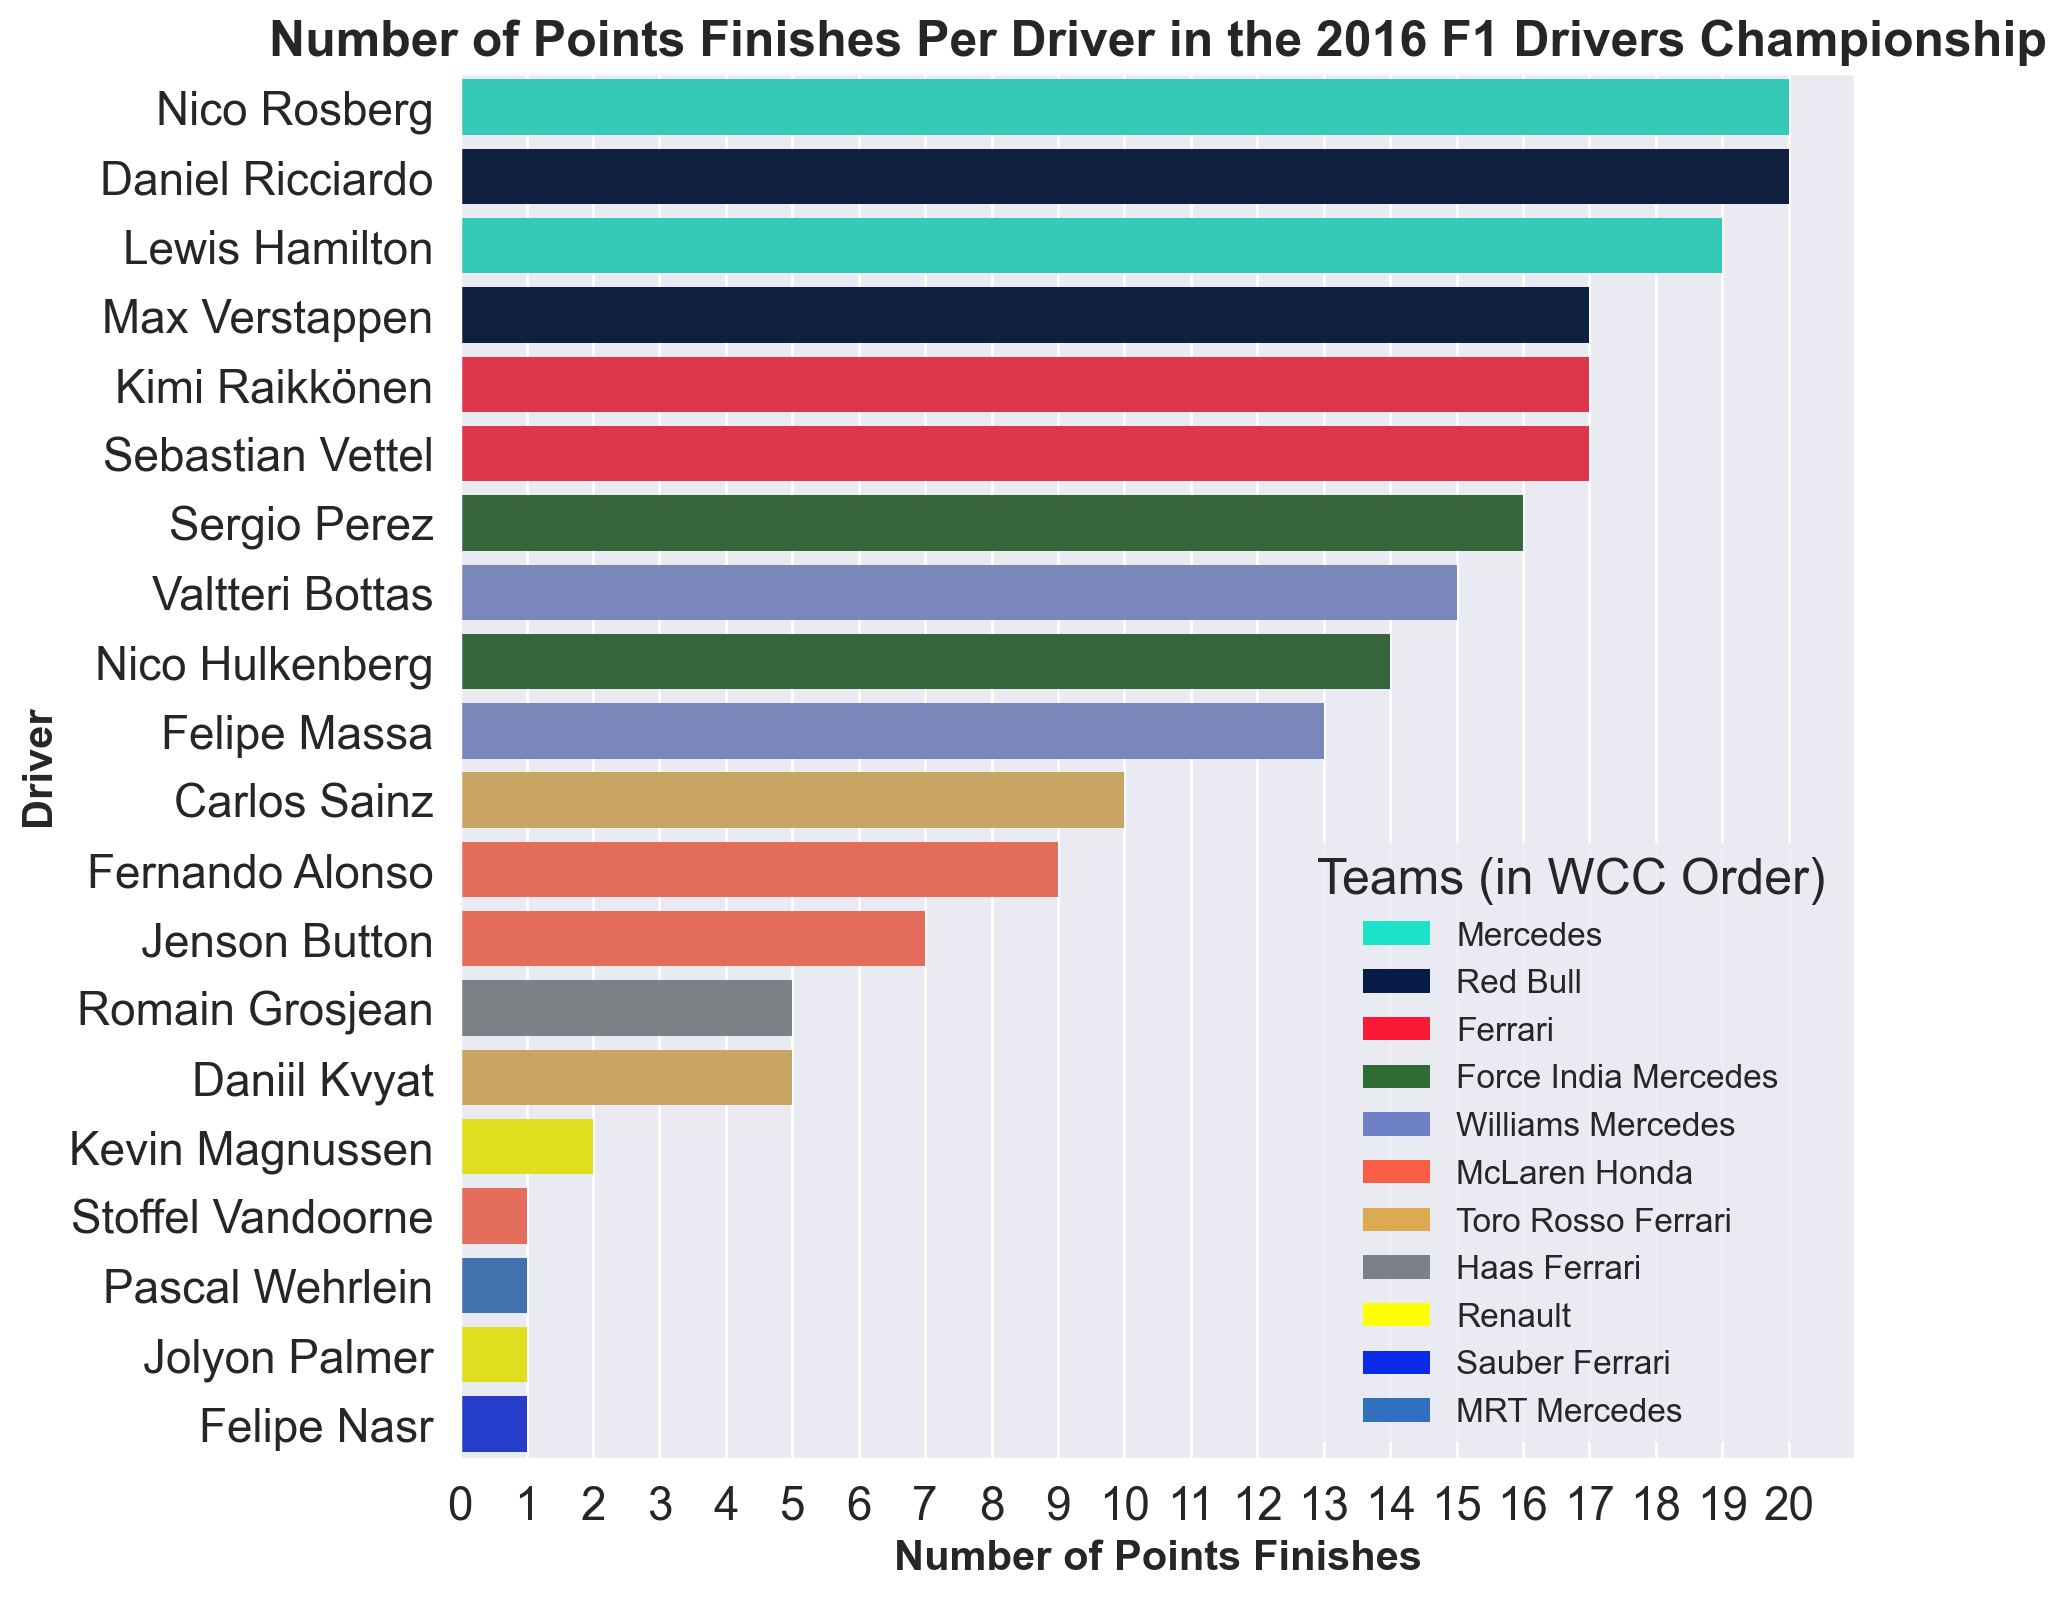

In [8]:
pfCnt = pf_data['Driver'].value_counts().rename_axis(
    'Driver').reset_index(name='Points Finishes')
plt.figure(figsize=(9,9))
pfplot = sns.barplot(data=pfCnt, x='Points Finishes',
                      y='Driver', orient='h', palette=driver_palette)
pfplot.set_ylabel("Driver", fontsize=15, fontweight='bold')
pfplot.set_xlabel("Number of Points Finishes", fontsize=15, fontweight='bold')
pfplot.set_xticks(range(21))
plt.legend(title="Teams (in WCC Order)", handles=team_patches,fontsize=12)
pfplot.set_title("Number of Points Finishes Per Driver in the 2016 F1 Drivers Championship", fontsize=18, fontweight='bold')


Figure 4: Number of Points Finishes Per Driver in the 2016 F1 Drivers Championship. This bar graph shows us the frequency with which points-scoring drivers scored points, as well as the team they belonged to and the ranking of their teams, which lets us recall the team dynamics in order to contextualize the drivers' human performances relative to the performance of their machinery in terms of the number of times they scored points. The clearest example of a driver potentially outperforming their machinery is Grosjean, who scored all of Haas' points with five top 10 finishes. The color coding similarly tells us that not all teams had both drivers scoring points. 

We see that Rosberg and Ricciardo both finished in the top 10 in 20 of the 21 races in the 2016 season, while Hamilton finished in the top 10 in one fewer race. With the inclusion of color coding for the teams, we can loosely see which drivers might have outperformed their teammates, and potentially their cars by looking for drivers who have scored significantly more podiums than their teammates. The clearest such example is Grosjean, who scored all of Haas' points with five top 10 finishes. 

While Table 1 tells us that every team scored points in the 2016 season, Table 2 and Figure 7 collectively tell us that not every driver was able to finish in the top 10, including Grosjean's teammate and both of the drivers that sat alongside Wehrlein. Now that we've seen the first statistic where Rosberg has finished above Hamilton, let's dive into why Rosberg might have had more points finishes than Hamilton, by looking at how often which drivers didn't finish at all.

### Number of DNFs per Driver in the 2016 F1 Season

Text(0.5, 1.0, 'Number of DNFs per Driver in the 2016 F1 Season')

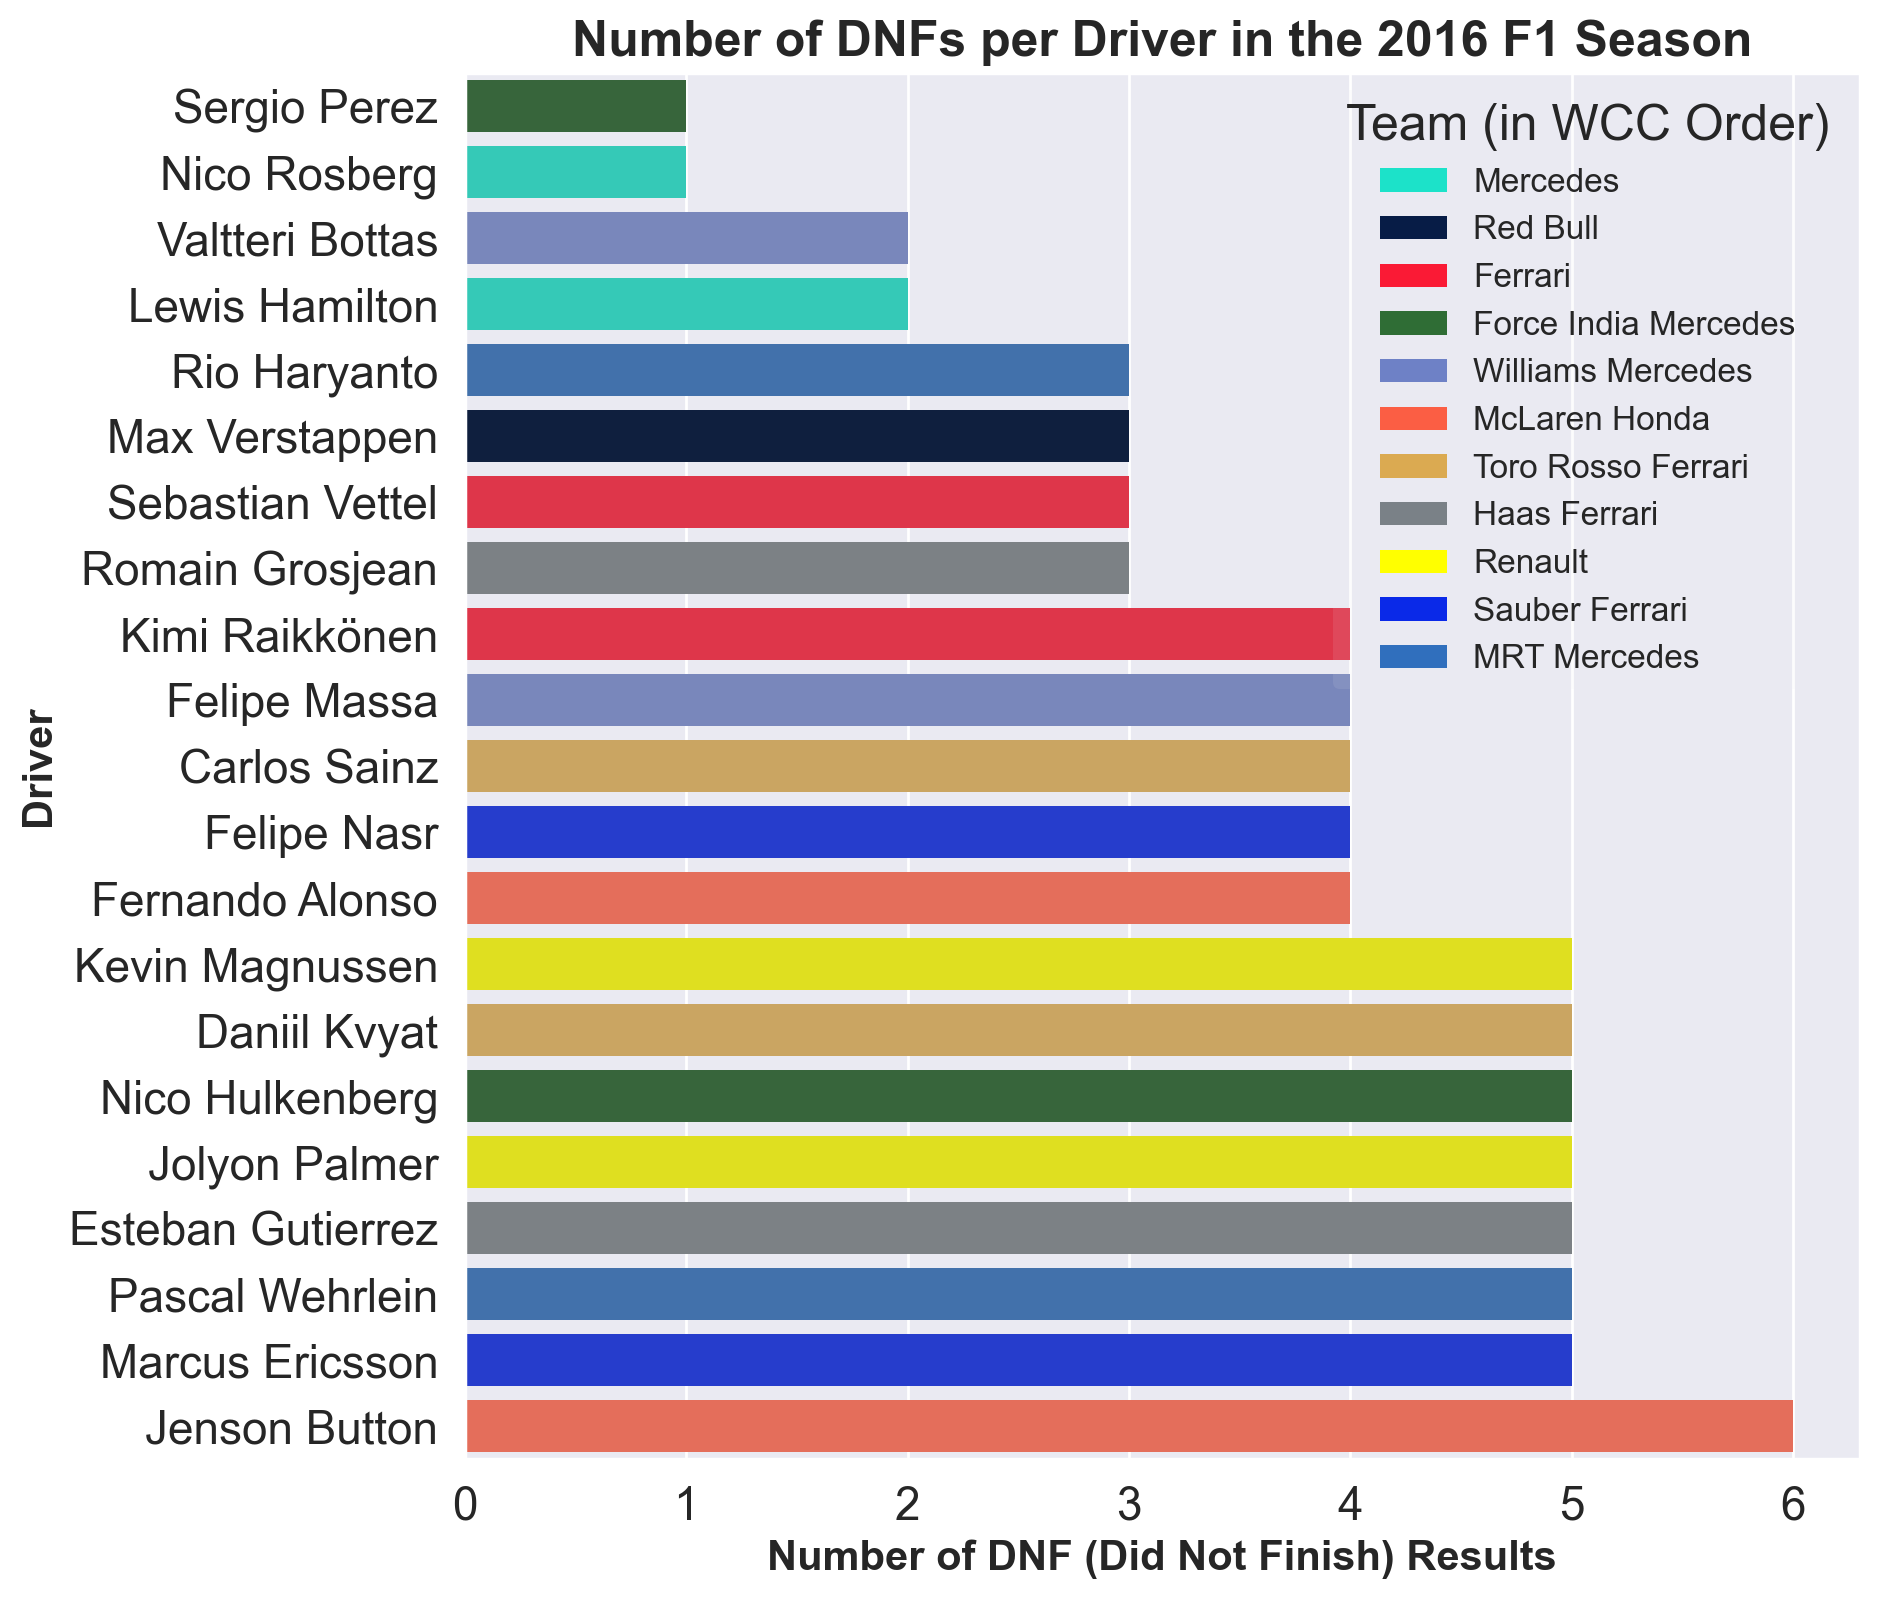

In [9]:
DNFCnt_driver = dnf_data['Driver'].value_counts().rename_axis(
    'Driver').reset_index(name='DNFs').sort_values('DNFs', ascending=True)
plt.figure(figsize=(9,9))
DNFPlot = sns.barplot(data=DNFCnt_driver, x='DNFs',
                      y='Driver', orient='h', palette=driver_palette)
DNFPlot.set_ylabel("Driver", fontsize=15, fontweight='bold')
DNFPlot.set_xlabel("Number of DNF (Did Not Finish) Results", fontsize=15, fontweight='bold')
plt.legend(title="Team (in WCC Order)", handles=team_patches, fontsize=12, framealpha=0.1)
DNFPlot.set_title("Number of DNFs per Driver in the 2016 F1 Season", fontsize=18, fontweight='bold')


Figure 5: Number of DNFs per Driver in the 2016 F1 Season. This bar graph visualizes the number of DNF results alongside Team Standings, and shows us that Hamilton has 2 DNFs to Rosberg's 1, and that Ricciardo had no DNF results over the entire season. Further, we can easily visualize reliability (and cautiousness) differences between teammates, which are especially striking at MRT, McLaren, and Sauber.

DNF results are very important in Formula 1, since they capture both a team's reliability in terms of their car, and a driver's reliability in terms of driving cleanly and avoiding incidents. In the absolute worst case scenario, a driver could lose 25 points if they DNFed out of the lead of the race, which might have massive consequences in both the team and driver standings. This much is especially true, when one is with a team as dominant as Mercedes. Figure 4 in combination with Figure 5 tells us that the two Mercedes drivers ended every single race that they finished in the top 10, as they DNFed 1 and 2 times respectively and finished in the points in 20 and 19 races respectively. Figure 3 expands on this to tell us that the Mercedes drivers only collectively finished off the podium (but still in the points) 6 times between themselves!

### Top 5 Drivers' Points Progression in the 2016 F1 Season

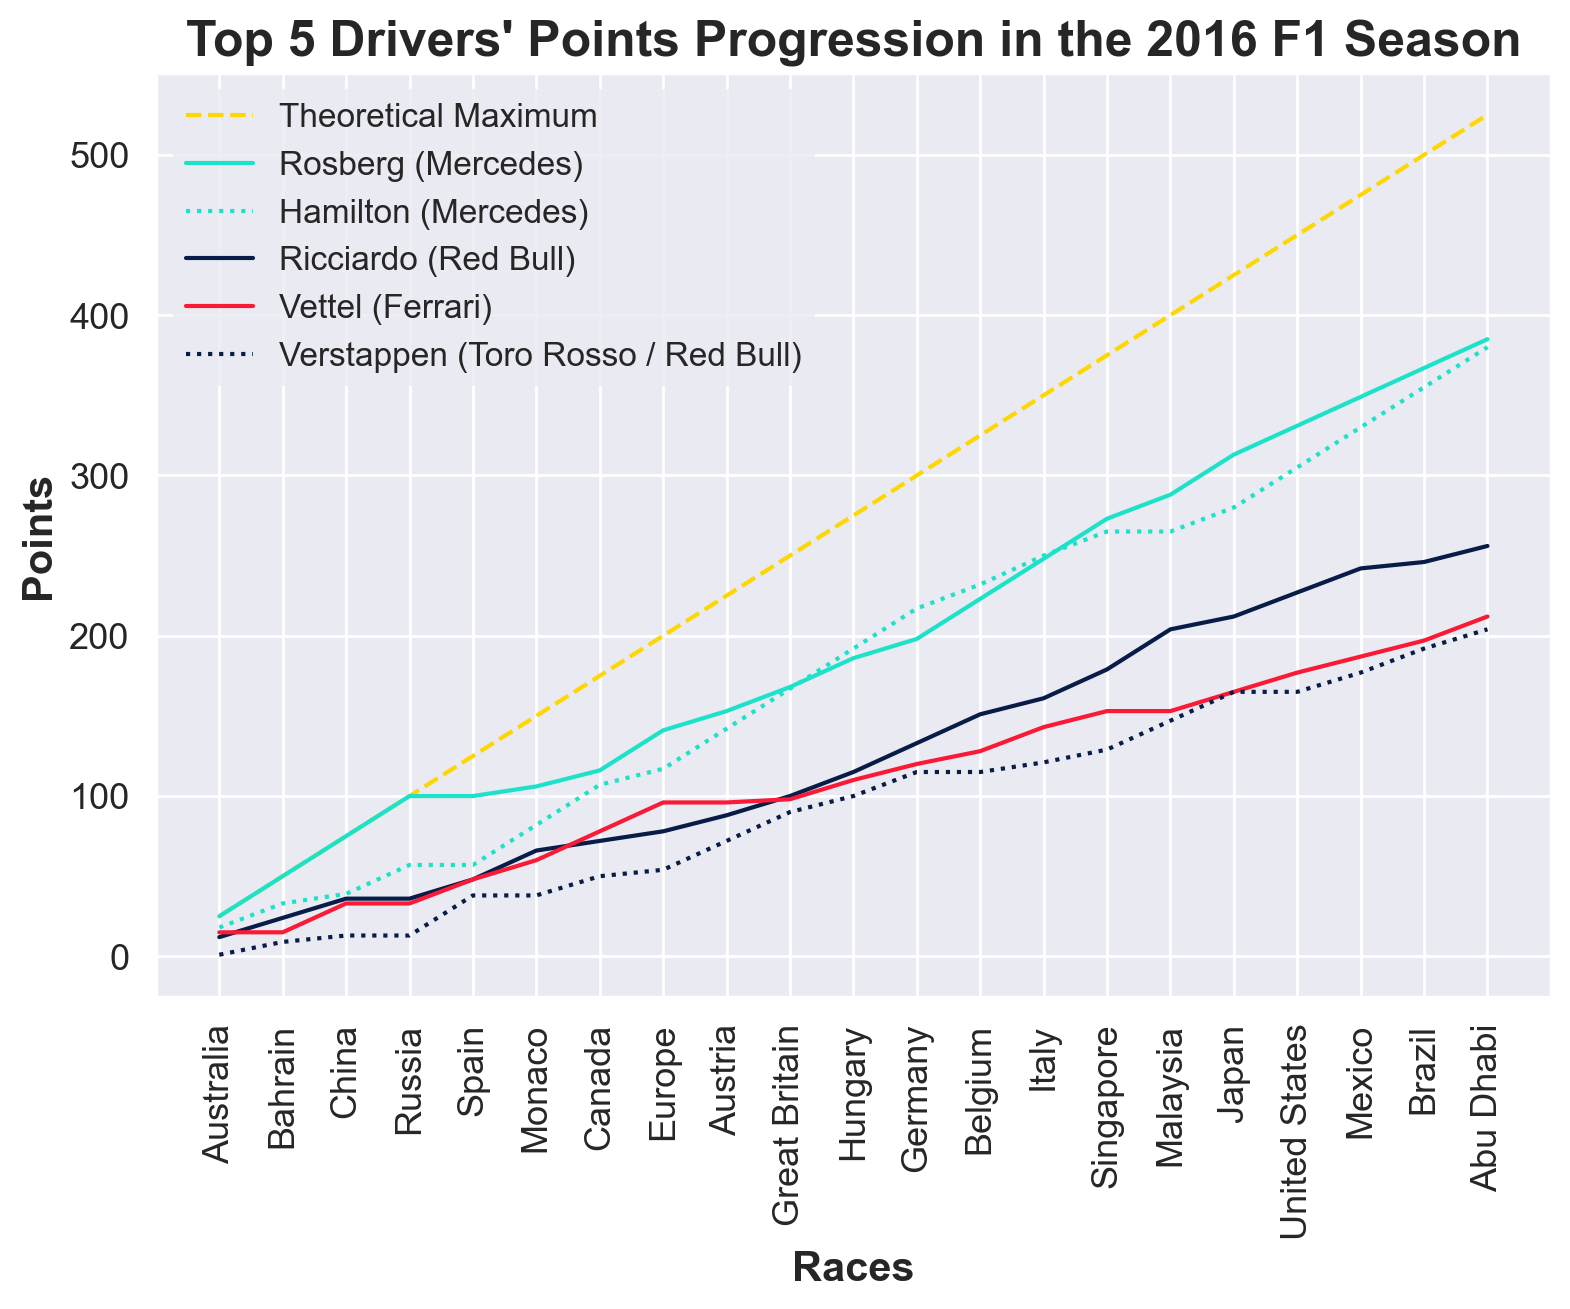

In [10]:
hamilton = season_2016[season_2016['Driver'] == 'Lewis Hamilton']['Points'].values
rosberg = season_2016[season_2016['Driver'] == 'Nico Rosberg']['Points'].values
ricciardo = season_2016[season_2016['Driver'] == 'Daniel Ricciardo']['Points'].values
vettel = season_2016[season_2016['Driver'] == 'Sebastian Vettel']['Points'].values
verstappen = season_2016[season_2016['Driver'] == 'Max Verstappen']['Points'].values
x = np.linspace(0,20,100)
y = 25*(x+1)
plt.plot(x, y, color='gold', label='Theoretical Maximum', ls = '--')
plt.plot(get_season_progression(rosberg), color='#1ce2c9', label='Rosberg (Mercedes)')
plt.plot(get_season_progression(hamilton), color='#1ce2c9', label='Hamilton (Mercedes)', ls = 'dotted')
plt.plot(get_season_progression(ricciardo), color='#071c46', label='Ricciardo (Red Bull)')
plt.plot(get_season_progression(vettel), color='#fa1a35', label='Vettel (Ferrari)')
plt.plot(get_season_progression(verstappen), color='#071c46', label='Verstappen (Toro Rosso / Red Bull)', ls = 'dotted')
plt.title("Top 5 Drivers' Points Progression in the 2016 F1 Season", fontsize=18, fontweight='bold')
plt.xlabel('Races', fontsize=15, fontweight='bold')
plt.ylabel('Points', fontsize=15, fontweight='bold')
plt.xticks(np.arange(21), races, rotation=90,fontsize=13) 
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

Figure 6: Top 5 Drivers' Points Progression in the 2016 F1 Season. This line graph shows the top five drivers' cumulative points over the 2016 F1 season as well as their gaps to the the other drivers in the top five, with the color coding showing us which team each driver belonged to, and whether or not they were teammates, with the driver that finished lower in the standings represented by a dotted line. The graph also shows us the theoretical maximum number of points available at any point in the season (attained only by winning each race in the season). The general slope of both of the Mercedes drivers' points is similar, which makes sense since they traded wins and podiums evenly over the season. 

We also see that Rosberg matched the theoretical maximum number of points attainable for the first 4 races by winning them all. The graph shows us that the two Mercedes drivers never dipped below second place in the standings at any point in the season, which goes to show the extent to which the Mercedes drivers separated themselves from the pack. Verstappen's stint at Toro Rosso before Spain is also clearly distinguishable from the remainder of his season at Red Bull, based on the large increase in his points in Spain. The change in form for Vettel's season is also fairly clear from Europe to Great Britain, where he definitively loses third place in the Drivers Championship.

These graphics and metrics have made it clear that the most exiting battle for the lead revolved around Hamilton and Rosberg, so we'll focus on their results in relation to each other.

## The Mercedes Driver Battle

### Rosberg vs Hamilton Points Gap in the 2016 F1 Season

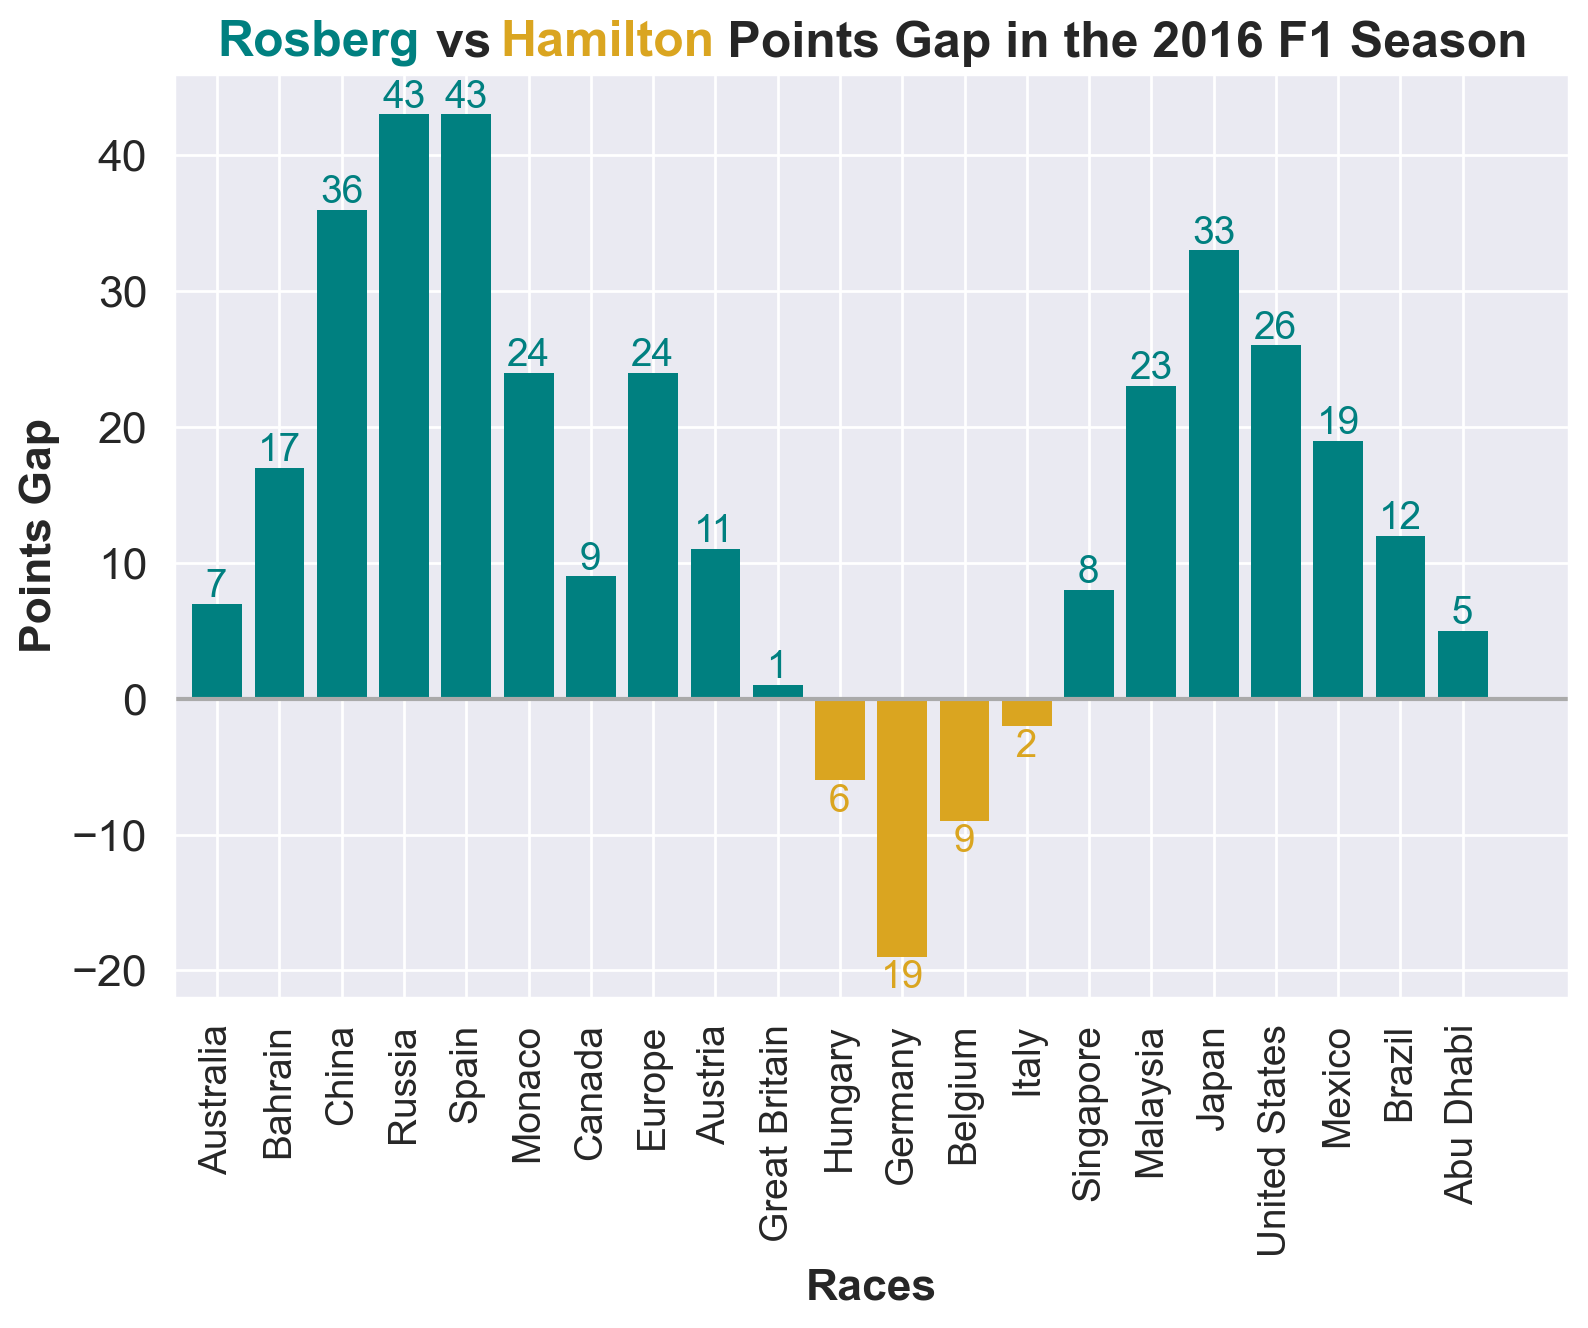

In [11]:
rosPts = season_2016[season_2016['Driver'] == 'Nico Rosberg']['Points'].values
hamPts = season_2016[season_2016['Driver'] == 'Lewis Hamilton']['Points'].values
pointsGap = np.cumsum(rosPts) - np.cumsum(hamPts)  # type: ignore
c = []
for i in range(len(pointsGap)):
    if pointsGap[i] >= 0:   c.append('teal')
    else:    c.append('goldenrod')
plt.axis([-0.7, 21.7, min(pointsGap)-3, max(pointsGap)+3])
plt.bar(races, pointsGap, color=c)
for i in range(len(pointsGap)):
    if pointsGap[i] >= 0:   
        vsh = 0.5
        color = 'teal'
    else:   
        vsh = -2.3
        color = 'goldenrod'
    plt.text(i-0.35, pointsGap[i]+vsh, "{:2}".format(int(abs(pointsGap[i]))), color = color, fontsize=14)
plt.axhline(0, color='#aaaaaa')
plt.text(4.55, 47.3, "Hamilton", color="goldenrod", fontsize=18, fontweight = 'bold')
plt.text(0.01, 47.3, "Rosberg", color="teal", fontsize=18, fontweight = 'bold')
plt.title("                vs                 Points Gap in the 2016 F1 Season", 
          fontsize=18, fontweight='bold')
plt.xlabel('Races', fontsize=16, fontweight='bold')
plt.xticks(range(0,len(races)), races, fontsize=14, rotation=90)
plt.ylabel('Points Gap', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.show()

Figure 7: Head to Head Points Between Rosberg and Hamilton in the 2016 Formula 1 Season. The bar graph shows the points gap between Rosberg and Hamilton after each race, and also shows the largest and smallest points gaps and the number of times the championship lead changed hands over the course of the season. The bars show the points gap at the conclusion of the corresponding race, i.e. the gap was 1 point after the conclusion of the British race. As shown by the color-coding for the drivers, positive bars represent races after which Rosberg led the championship, and negative bars represent races after which Hamilton led the championship. We see that Rosberg actually led the majority of the championship, with Hamilton only leading for 4 races, between the Hungary race and the Singapore race, with relatively small points gaps throughout when compared to Rosberg's towering leads after China, Russia, and Japan.

We can identify three potentially pivotal races in the championship in terms of points swing: China (19 points in favor of Rosberg), Monaco (19 points in favor of Hamilton), and Malaysia (15 points in favor of Rosberg). We also see the double DNF in Spain, as the gap between the two remained the same when both drivers DNFed.

A cursory search tells us the double DNF at Spain was caused by a collision between Hamilton and Rosberg and gave a young Verstappen his first win on his first race with Red Bull. Anyways, having identified these potentially pivotal races, one wonders what happened in these races for the championship to have gone to Rosberg in the end? Let's look at the two Mercedes drivers' results over the season.

Text(0.5, 1.0, 'Rosberg vs Hamilton Results in the 2016 F1 Season')

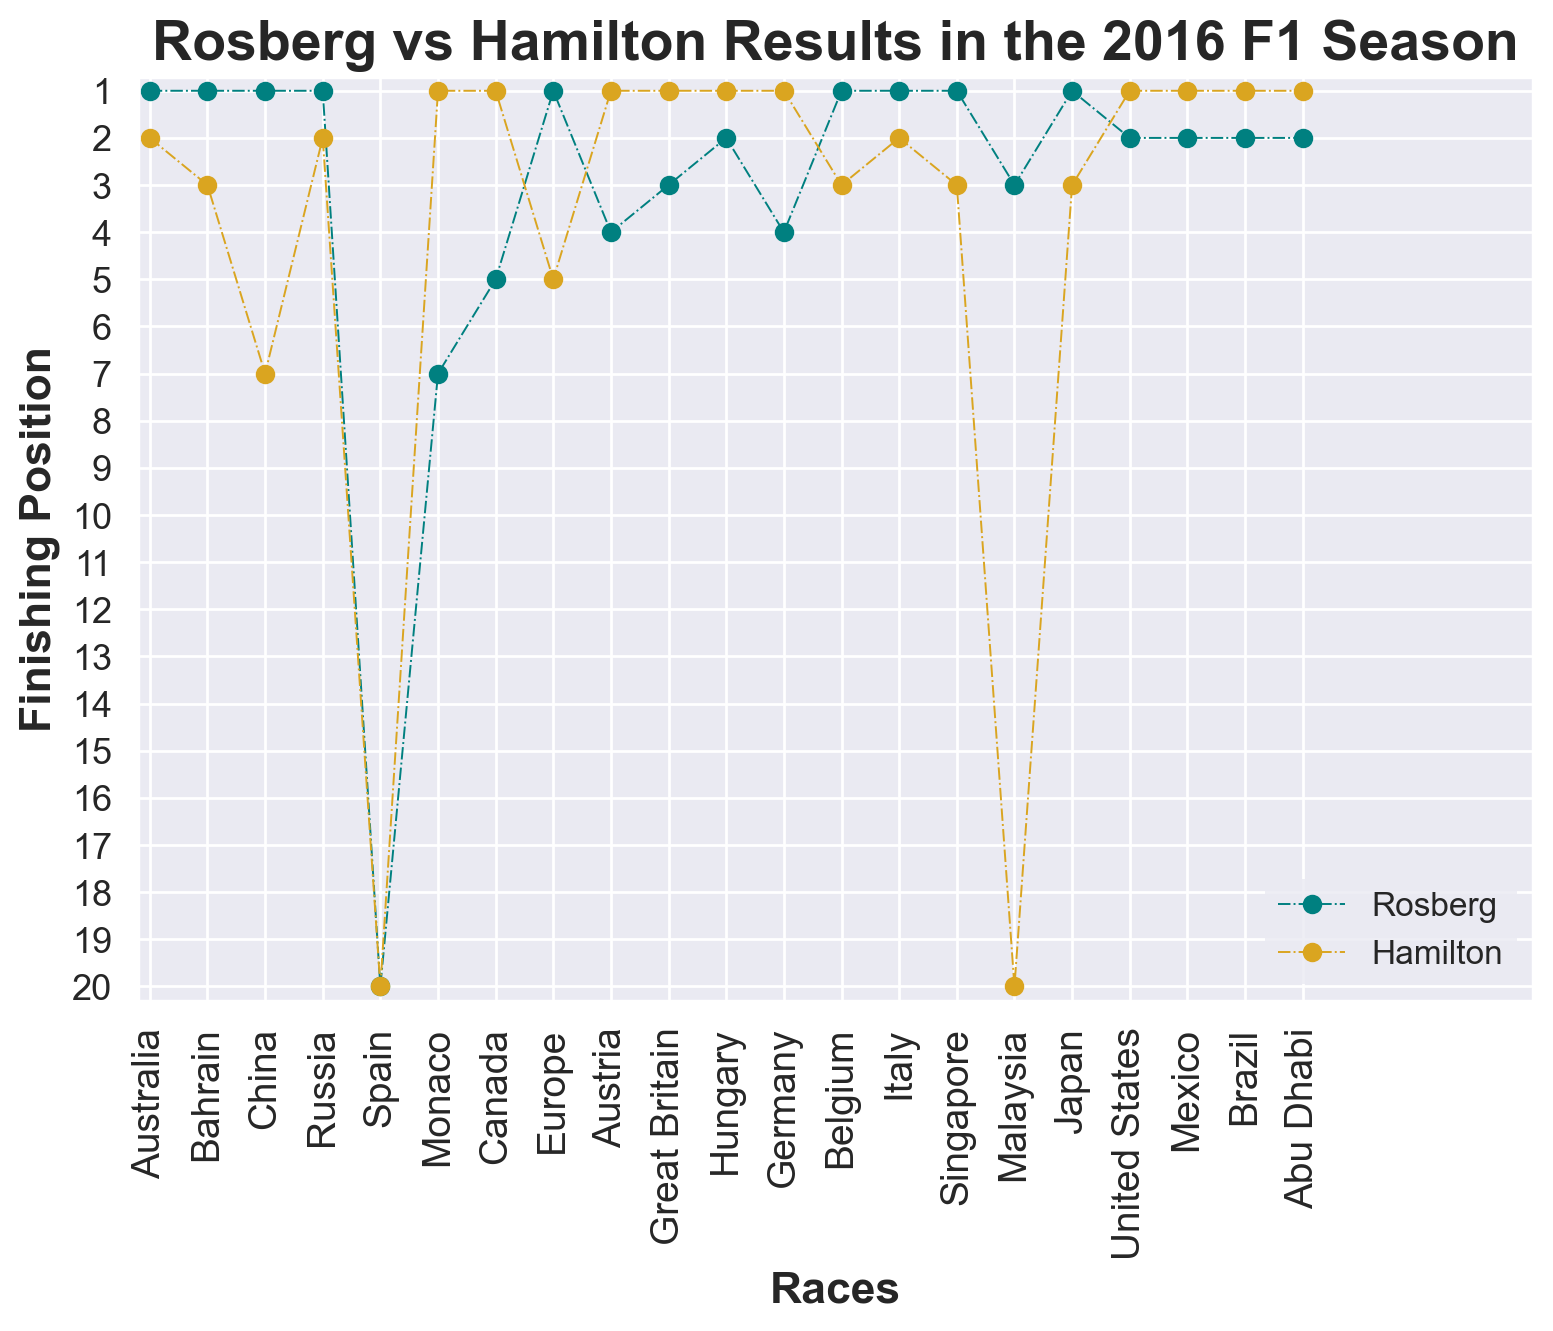

In [12]:
race_results = season_2016[['Track', 'Position', 'Driver']]
race_results.replace('NC', '20', inplace=True)
race_results.replace('DQ', '20', inplace=True)
race_results = race_results.astype({'Position':'int32'}, errors='ignore')
plt.axis((-0.2,24,20.3,0.7))
positions = race_results[race_results['Driver'] == 'Nico Rosberg']['Position'].values
plt.plot(positions, label='Rosberg', color = 'teal',marker='o', linewidth=0.7, linestyle='-.')
positions = race_results[race_results['Driver'] == 'Lewis Hamilton']['Position'].values
plt.plot(positions, label='Hamilton', color = 'goldenrod', marker='o', linewidth=0.7, linestyle='-.')
plt.xlabel('Races', fontsize=16, fontweight='bold')
plt.ylabel('Finishing Position', fontsize=16, fontweight='bold')
plt.xticks(np.arange(21), races, rotation=90,fontsize=14)
plt.yticks(np.arange(1,21),fontsize=13)
plt.legend(fontsize=12)
plt.title("Rosberg vs Hamilton Results in the 2016 F1 Season", 
          fontsize=20, fontweight='bold')

Figure 8: Rosberg and Hamilton's Race Positions in the 2016 Formula 1 Season. This line graph shows the two Mercedes drivers' finishing positions for each of the races over the season (with DNFs represented as last place), showing us the number of times each driver finished in a certain position, and the timing with which they did so, contextualizing the points gaps, and giving us a better idea of what happened in each race of the season for the two drivers.

Looking at the three races we previously identified as being pivotal to the championship race, China represented a rare finish in 7th (off the podium) for Hamilton while Rosberg took the win, Monaco represented an identical situation with the roles reversed, and Malaysia was a DNF for Hamilton while Rosberg took third place. We also see Hamilton's additional finish off the podium in the European race (as noted in Figure 6), while Rosberg took the win. We also see that the lowest non-DNF position for both drivers was 7th place, which is a very impressive result.

Hamilton's DNF from the lead of the Malaysian Grand Prix represented a loss of 25 points in his final standings, and essentially sealed the season, even with Hamilton winning the last 4 races while Rosberg finished second, with 4 consecutive finishes with 7 point swings in favor of Hamilton closing the gap down to just 5 points after the Abu Dhabi race.

All in all, it's not so surprising that Rosberg opted to hang up his gloves at the end of the season rather than try and perform at this level again, while also hoping for this sort of luck to barely eke out future seasonwide wins over his teammate. Mercedes also learned from this season, specifically the double DNF in Spain, and have since strictly managed their drivers' relationships with a clear #1 and #2 driver defined early on in the season.